In [1]:
# Ridge Regression (Regularization Present-Objective Function includes L2 Norm of coefficients)
import pandas as pd
print(pd.__version__)

0.23.0


In [2]:
# Read data
auto_data = pd.read_csv('C:/Users/chait/Desktop/Machine Learning/Datasets/automobile.csv',quotechar='"')
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Mark missing values as NaN (Not a Number) 
import numpy as np
auto_data = auto_data.replace('?',np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Convert columns with numeric values to numeric data type
auto_data['price']= pd.to_numeric(auto_data['price'],errors='coerce')
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'],errors = 'coerce')

In [6]:
# Drop useless features
auto_data=auto_data.drop('normalized-losses',axis=1)
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [ ]:
# Map categorical data with numeric significance to numeric values
cylinders_dict = {'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'twelve':'12'}
auto_data['num-of-cylinders'].replace(cylinders_dict,inplace=True)
auto_data['num-of-doors'].replace(cylinders_dict,inplace=True)


In [14]:
auto_data['num-of-cylinders'].head()
auto_data['num-of-doors'].head()

0    2.0
1    2.0
2    2.0
3    4.0
4    4.0
Name: num-of-doors, dtype: float64

In [12]:
# Convert remaining categorical data to one-hot encoding form
auto_data = pd.get_dummies(auto_data,columns=['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system'])

In [13]:
# Replace rows with missing values
auto_data=auto_data.dropna()
auto_data[auto_data.isnull().any(axis=1)]

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi


In [18]:
# Split Dataset into training and test sets
from sklearn.model_selection import train_test_split
X= auto_data.drop('price',axis=1)
Y= auto_data['price']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
# Select model and train/fit it
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1, normalize=True)
ridge_model = ridge_model.fit(x_train,y_train)
ridge_model.score(x_train,y_train)

0.9062157115728231

In [25]:
# Predict the labels for test set
y_predict  =ridge_model.predict(x_test)

In [26]:
print(pd.Series(ridge_model.coef_,x_train.columns).sort_values())

engine-location_front    -3576.562295
make_isuzu               -1394.274551
make_toyota              -1079.167919
make_peugot              -1053.590563
make_nissan               -931.645855
make_subaru               -872.304872
fuel-system_mfi           -820.812233
make_plymouth             -757.003383
drive-wheels_fwd          -720.910262
make_mitsubishi           -700.234665
make_volkswagen           -697.136304
fuel-system_spdi          -581.353598
body-style_wagon          -580.893588
engine-type_l             -554.127970
drive-wheels_4wd          -483.609357
fuel-system_2bbl          -393.996213
make_mazda                -375.784521
body-style_hatchback      -370.509119
aspiration_std            -340.828802
fuel-type_gas             -307.516730
fuel-system_spfi          -212.151592
engine-type_dohc          -197.915678
make_dodge                -183.232131
make_alfa-romero          -135.996831
make_volvo                -105.583545
num-of-doors               -96.914076
fuel-system_

In [27]:
# Evaluate the model using metrics
from sklearn.metrics import r2_score, mean_squared_error
import math
r2 = r2_score(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse= math.sqrt(mse)
print('R2 Score-->',r2,'\nMean Squared Error-->',mse,'\nRoot Mean Squared Error-->',rmse)

R2 Score--> 0.9341757436272304 
Mean Squared Error--> 3788491.780066432 
Root Mean Squared Error--> 1946.4048345774402


Populating the interactive namespace from numpy and matplotlib


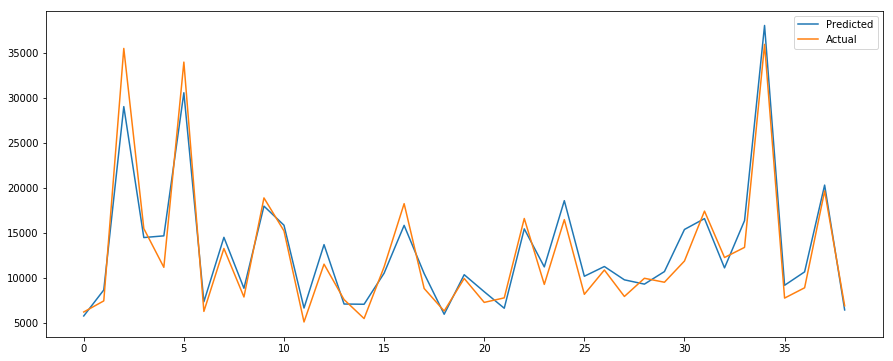

In [29]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(y_predict,label = 'Predicted')
plt.plot(y_test.values, label ='Actual')
plt.legend()
plt.show()

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.tsatools import lagmat